In [1]:
#Practise 2 MNIST


In [29]:
#IMPORT STUFF
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


In [30]:
#load model PRELOAD

dataset = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = dataset.load_data()


In [31]:
#check
x_train.shape

(60000, 28, 28)

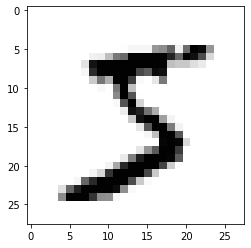

In [32]:
plt.imshow(x_train[0],cmap='Greys')

In [33]:
#normalize the data
x_train = x_train/255
x_test = x_test/255


In [39]:
#reshape the data
x_train=x_train.reshape(x_train.shape[0],1*28*28)


In [40]:
x_test=x_test.reshape(x_test.shape[0],1*28*28)

In [63]:

x_test_nonreshape = x_test.reshape(x_test.shape[0],28,28)
x_test_nonreshape.shape

(10000, 28, 28)

In [41]:
x_train.shape


(60000, 784)

In [42]:
x_test.shape

(10000, 784)

In [46]:
#create the model
model = keras.Sequential([
    keras.layers.Dense(256,input_shape=(784,),activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='sigmoid')
])

In [47]:
#compile the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [48]:
#model fitting

model.fit(x_train,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 18s 11ms/step - loss: 0.2613 - accuracy: 0.9241 - val_loss: 0.1417 - val_accuracy: 0.9553
Epoch 2/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0997 - accuracy: 0.9693 - val_loss: 0.0995 - val_accuracy: 0.9692
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0671 - accuracy: 0.9794 - val_loss: 0.1019 - val_accuracy: 0.9718
Epoch 4/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.1028 - val_accuracy: 0.9683
Epoch 5/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.0398 - accuracy: 0.9863 - val_loss: 0.0929 - val_accuracy: 0.9729
Epoch 6/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0893 - val_accuracy: 0.9753
Epoch 7/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.1324 -

In [49]:
#model evalutae
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0994 - accuracy: 0.9790


[0.09935655444860458, 0.9789999723434448]

In [50]:
#model prediction

y_pred = model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


In [54]:
pred = np.argmax(y_pred,axis=1)

In [56]:
#confusion matrix and classification report
report = classification_report(y_test,pred)

In [57]:
report

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       980\n           1       0.99      0.99      0.99      1135\n           2       0.95      0.99      0.97      1032\n           3       0.97      0.97      0.97      1010\n           4       0.98      0.97      0.98       982\n           5       0.97      0.97      0.97       892\n           6       0.98      0.98      0.98       958\n           7       0.98      0.97      0.98      1028\n           8       0.98      0.97      0.98       974\n           9       0.97      0.96      0.97      1009\n\n    accuracy                           0.98     10000\n   macro avg       0.98      0.98      0.98     10000\nweighted avg       0.98      0.98      0.98     10000\n'

In [58]:
report2 = confusion_matrix(y_test,pred)
report2

array([[ 974,    1,    0,    0,    0,    1,    1,    0,    2,    1],
       [   0, 1122,    6,    0,    0,    2,    4,    0,    1,    0],
       [   2,    0, 1024,    0,    0,    0,    2,    3,    1,    0],
       [   2,    0,   17,  977,    0,    6,    0,    6,    2,    0],
       [   0,    0,    8,    0,  955,    0,    3,    1,    0,   15],
       [   2,    0,    0,   16,    1,  867,    2,    0,    3,    1],
       [   3,    2,    0,    0,    8,    6,  939,    0,    0,    0],
       [   1,    2,   14,    2,    1,    0,    0,  999,    2,    7],
       [   2,    0,    7,    5,    1,    8,    3,    3,  943,    2],
       [   2,    2,    1,    6,    6,    7,    1,    7,    4,  973]],
      dtype=int64)

313/313 [==============================] - 1s 4ms/step
class is : 6


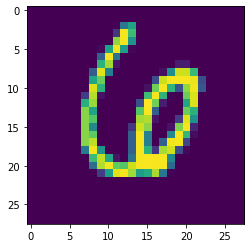

In [66]:
#testing
import random 

r=random.randint(1,100)
#we need nonreshaped
plt.imshow(x_test_nonreshape[r])

ans = model.predict(x_test)
print('class is :',np.argmax(ans[r]))